mach-zender_interferometer_wavelength_main.py



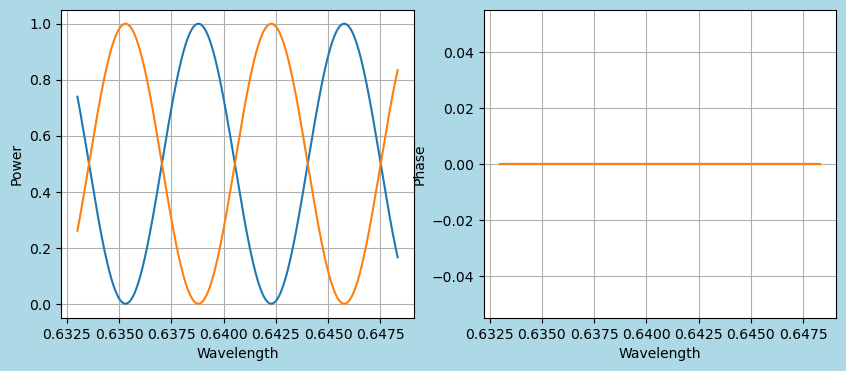

In [3]:

import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

import mach_zender_interferometer_wavelength_def

print('mach-zender_interferometer_wavelength_main.py')
print('')

m = 512

no = 1 # Refractive Index of medium

oplcommon1=100 #Common Path Length 1
oplcommon2=100 #Common Path Length 2

opl1 =100 
opl2= 1000
# Optical Path Length Difference (opl1-opl2) determines free spectral range as optical filter.

wl0 = 0.633; #wavelength in um
stepwl = 0.00003; # Step wavelength in um

PT1 = 0.5 # PT: Power Transmission of first beam splitter
PT2 = 0.49 # PT: Power Transmission of second beam splitter

# Define Input Electric Field

# Input Port 1 only
Ein1 = np.array([[1+0.0000j],[0-0.0000j]])
# Ein1 = np.array([[0.707+0.707j],[0]])

# Input Both 1 and 2 port
#Ein1 = np.array([[1+0j],[1-0j]]) 
#Ein1 = np.array([[0.707+0.707j],[-0.707-0.707j]])
#Ein1 = np.array([[1 + 0j],[-1 - 0j]])

# Input Port 2 only
#Ein1 = np.array([[0],[1]]) 
#Ein1 = np.array([[0],[0.707+0.707j]])

wlcol = np.zeros(m)

P1_powercol = np.zeros(m)
P1_phasecol = np.zeros(m)

P2_powercol = np.zeros(m)
P2_phasecol = np.zeros(m)



for ii in range(m):
 wl = wl0 + ii * stepwl
 wlcol[ii] =wl

 Eout1 = mach_zender_interferometer_wavelength_def.propagate1(wl, no, oplcommon1, oplcommon2, Ein1)
 Ein2 = Eout1
 
 Eout2 = mach_zender_interferometer_wavelength_def.beamsplitter(PT1, Ein2)
 # Each path enter first beam splitter
 Ein3 = Eout2
 
 Eout3 = mach_zender_interferometer_wavelength_def.propagate1(wl, no, opl1, opl2, Ein3)
 # Each path experience differnt path length
 Ein4 = Eout3
 
 Eout4 = mach_zender_interferometer_wavelength_def.beamsplitter(PT2, Ein4)
 # Each path enter second beam splitter
 Ein5 = Eout4
 
 Eout5 = mach_zender_interferometer_wavelength_def.propagate1(wl, no, oplcommon1, oplcommon2, Ein5)
 Ein6 = Eout5
 
 Eout_port1 = Ein6[0,0] 
 power_11 = (np.abs(Eout_port1))**2 # Optical power is calculated as square of absolute electric field strength
 P1_powercol[ii] = power_11
 
 P1_phase = cmath.phase(power_11)
 P1_phasecol[ii] = P1_phase
 
 Eout_port_2 = Ein6[1,0]
 power_22 = (np.abs(Eout_port_2))**2
 
 P2_powercol[ii] = power_22

 P2_phase = cmath.phase(power_22)
 P2_phasecol[ii] = P2_phase
 
 

fig = plt.figure(figsize = (10,4), facecolor='lightblue')

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(wlcol,P1_powercol,wlcol,P2_powercol)
ax1.set_xlabel("Wavelength")
ax1.set_ylabel("Power")
#ax1.set_ylim(0,2)
ax1.grid()

ax2.plot(wlcol,P1_phasecol,wlcol,P2_phasecol)
ax2.set_xlabel("Wavelength")
ax2.set_ylabel("Phase")
#ax2.set_ylim(-2,2)
ax2.grid()

plt.show()


